In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'creditcard.csv'
credit_card_data = pd.read_csv(file_path)

In [5]:
desc_stats_detailed = credit_card_data.describe(percentiles=[.01, .05, .25, .50, .75, .95, .99])


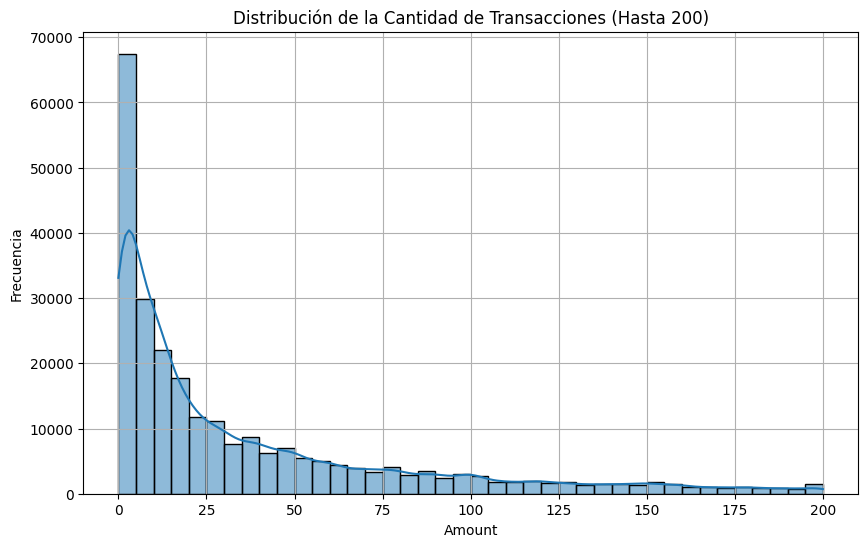

In [6]:
##Distribución de la Variable 'Amount' (Enfoque en Transacciones Menores)


plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data[credit_card_data['Amount'] <= 200]['Amount'], bins=40, kde=True)
plt.title('Distribución de la Cantidad de Transacciones (Hasta 200)')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [7]:
##3. Distribución de la Variable 'Class'

fraud_percent = credit_card_data['Class'].value_counts(normalize=True) * 100


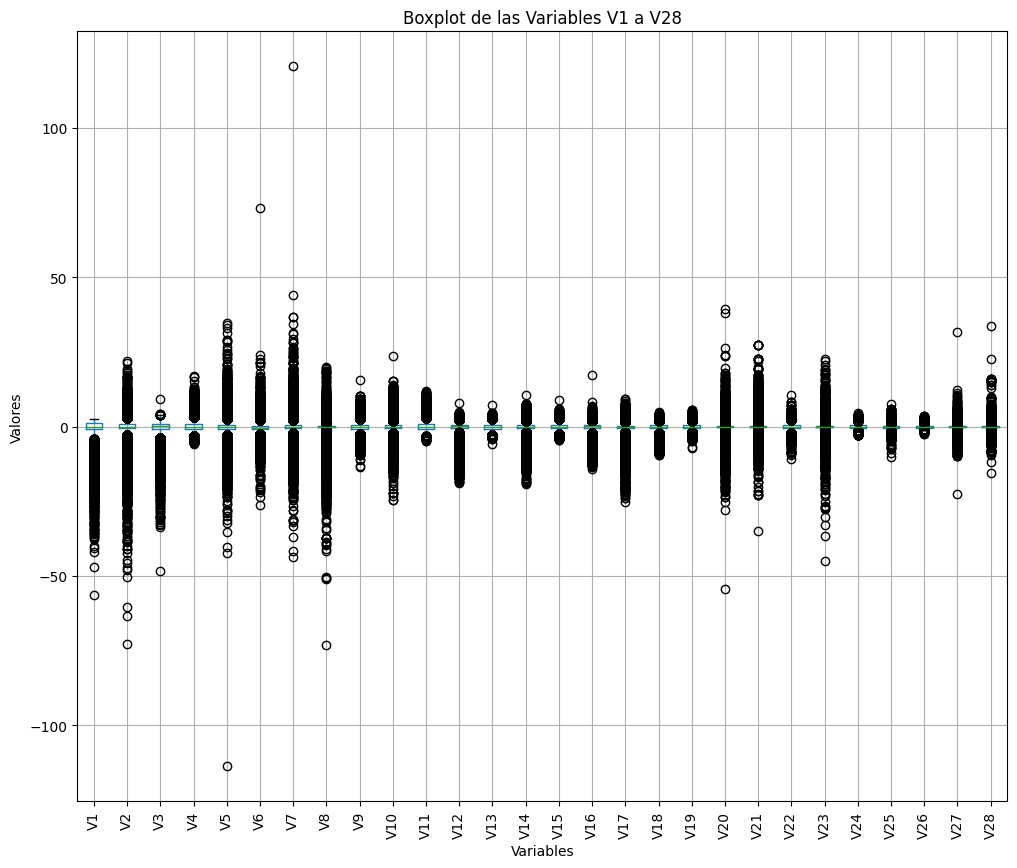

In [9]:
##4. Análisis de Variables 'V1' a 'V28'

plt.figure(figsize=(12, 10))
credit_card_data.iloc[:, 1:29].boxplot()
plt.title('Boxplot de las Variables V1 a V28')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


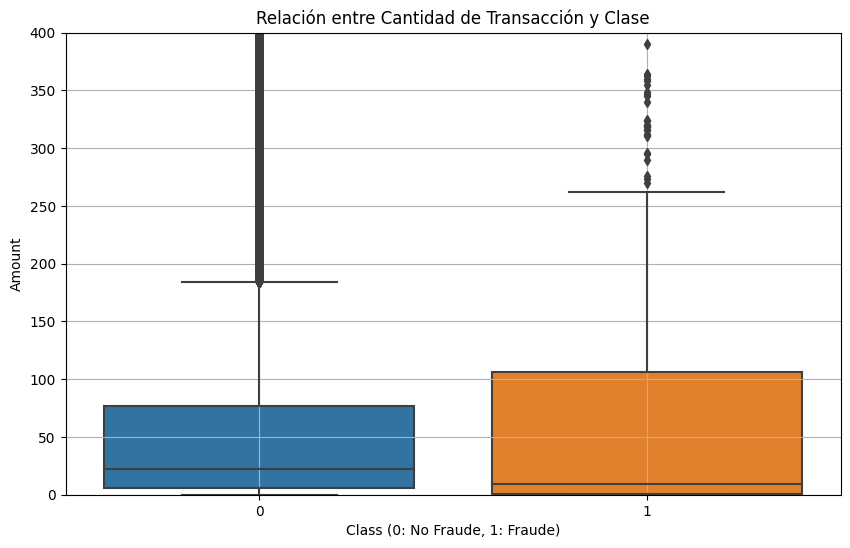

In [11]:
#5. Relación entre 'Amount' y 'Class'


plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Relación entre Cantidad de Transacción y Clase')
plt.xlabel('Class (0: No Fraude, 1: Fraude)')
plt.ylabel('Amount')
plt.ylim([0, 400])  # Limitar el eje y para una mejor visualización
plt.grid(True)
plt.show()


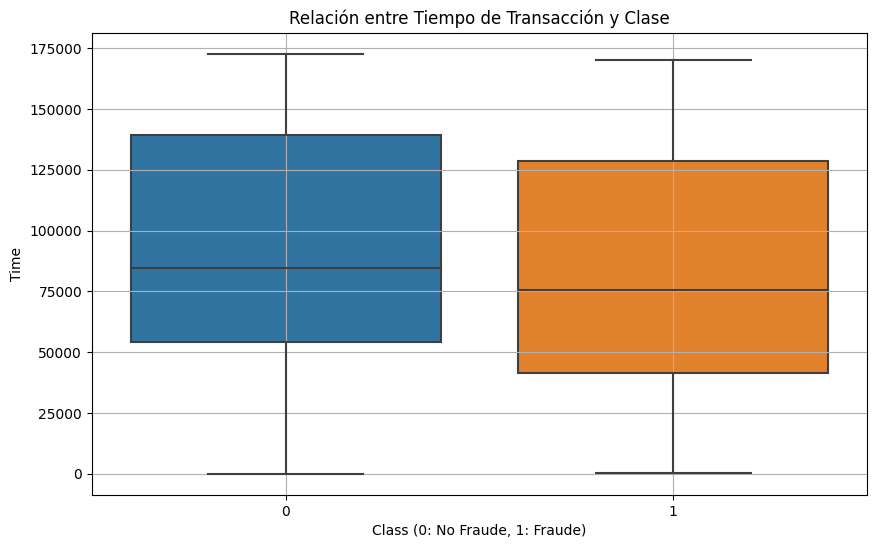

In [12]:
#6. Relación entre 'Time' y 'Class'

plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=credit_card_data)
plt.title('Relación entre Tiempo de Transacción y Clase')
plt.xlabel('Class (0: No Fraude, 1: Fraude)')
plt.ylabel('Time')
plt.grid(True)
plt.show()


In [33]:
##Preparación de datos 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Normalización
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# División de datos
X = data.drop('Class', axis=1)
y = data['Class']

# Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Modelo básico
def basic_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Modelo con regularización
def regularized_model(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim, kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(16, activation='relu', kernel_regularizer='l2'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Modelo profundo
def deep_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Crear modelos
model_basic = basic_model(X_train.shape[1])
model_regularized = regularized_model(X_train.shape[1])
model_deep = deep_model(X_train.shape[1])


In [36]:
# Entrenamiento
history_basic = model_basic.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)
history_regularized = model_regularized.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)
history_deep = model_deep.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

# Evaluación
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')

evaluate_model(model_basic, X_test, y_test)
evaluate_model(model_regularized, X_test, y_test)
evaluate_model(model_deep, X_test, y_test)


Epoch 1/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9679 - loss: 0.0821 - val_accuracy: 0.9963 - val_loss: 0.0134
Epoch 2/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9975 - loss: 0.0111 - val_accuracy: 0.9975 - val_loss: 0.0091
Epoch 3/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 4/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 5/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 5s 987us/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 6/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 7/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 8/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9993 - loss: 0.00